# Prediction using Clustering technique in Machine Learning

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
#Loading the dataset
df = pd.read_csv('2_Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Data Preprocessing

In [4]:
df = df.rename(columns={'Genre': 'Gender', 'Annual Income (k$)': "Ann_Income", 'Spending Score (1-100)': 'Spen_Score'})

In [5]:
df.head()

,CustomerID,Gender,Age,Ann_Income,Spen_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Ann_Income  200 non-null    int64 
 4   Spen_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Gender']=df['Gender'].replace('Male',0).replace('Female',1)
df.Gender.unique()

array([0, 1], dtype=int64)

In [9]:
#Checking for null values
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Ann_Income    0
Spen_Score    0
dtype: int64

<AxesSubplot:title={'center':'Box plot'}>

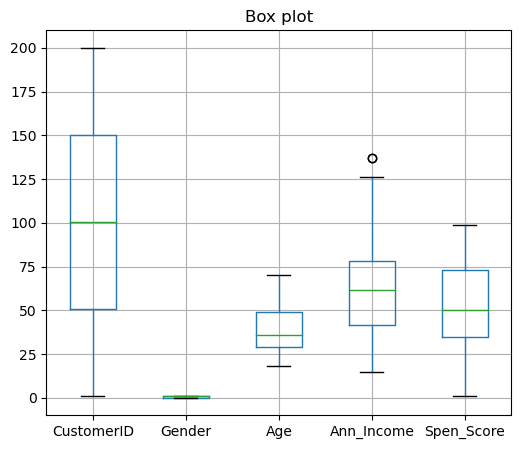

In [10]:
#Create Box Plot
plt.figure(figsize=(6,5))
plt.title('Box plot')
df.boxplot()

In [11]:
X = df.drop(columns=['CustomerID','Gender','Age'], axis=1).values

C:\Users\1629s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


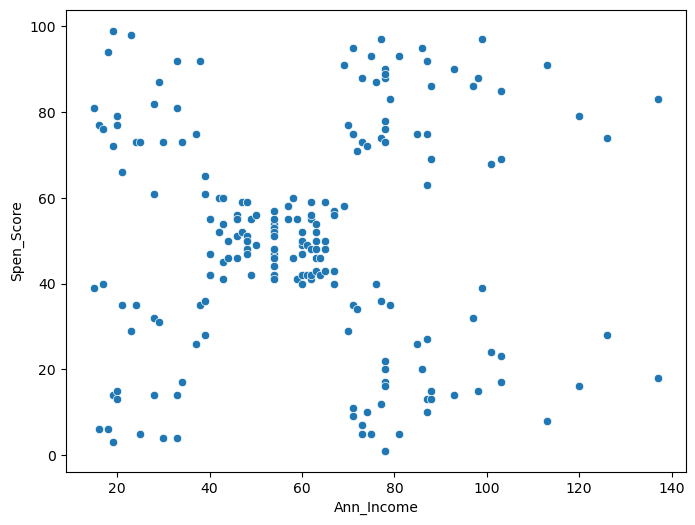

In [12]:
# scatter plot for finding clusters 
plt.figure(figsize=(8,6))
sns.scatterplot(X[:,0], X[:,1])
plt.xlabel('Ann_Income')
plt.ylabel('Spen_Score')
plt.show()

## Finding value of K using Elbow Method

C:\Users\1629s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


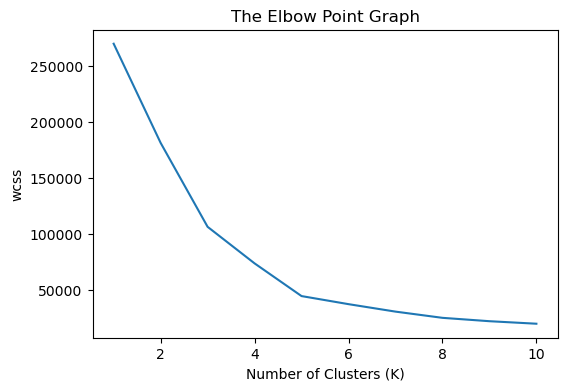

In [13]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

###### wcss doesn't reduce much after K=5, Hence we can choose 5 as the perfect K value or clusters.

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)
Y = kmeans.fit_predict(X)

### Centroid Points

In [15]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [16]:
labels = kmeans.labels_
n_clusters = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters)

Number of estimated clusters: 5


In [17]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Ann_Income','Spen_Score']])
df['Spending and Income Cluster'] =clustering2.labels_

### Visualize the clusters formed

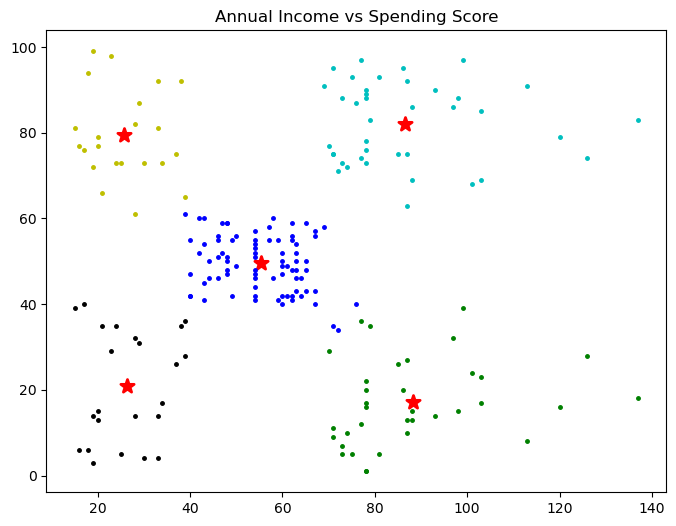

In [18]:
cluster_centers = kmeans.cluster_centers_

colors = 10*['y.','g.','b.','c.','k.','y.','m.']

plt.figure(figsize=(8,6))
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 5)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker="*",color='r', s=100, linewidths =2)
plt.title('Annual Income vs Spending Score')

plt.show()

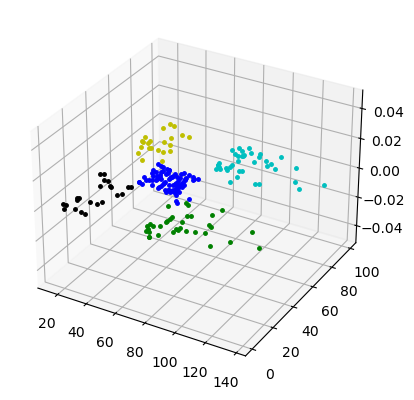

In [19]:
#3D visualization 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 5)